In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)

2.2.3


In [2]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df_exploded = df.explode('job_skills')

In [4]:
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [34]:
job_title = 'Data Analyst'
df_exploded = df_exploded[df_exploded['job_title_short'] == job_title]

In [35]:
median_salary = df_exploded.groupby('job_skills')['salary_year_avg'].median()

In [36]:
df_median_salary = median_salary.reset_index(name='median_salary')

In [37]:
df_median_salary.head()

,job_skills,median_salary
0,airflow,111175.0
1,airtable,90000.0
2,alteryx,105000.0
3,angular,109101.0
4,angular.js,NaN


In [38]:
skill_count = df_exploded.groupby('job_skills').size()

In [39]:
df_skill_count = skill_count.reset_index(name='skill_count')

In [40]:
df_skill_count.head()

,job_skills,skill_count
0,airflow,2002
1,airtable,88
2,alteryx,4570
3,angular,376
4,angular.js,2


In [41]:
df_merged = df_median_salary.merge(df_skill_count, how='inner', on='job_skills')

In [42]:
df_merged.sort_values(by='skill_count', ascending=False, inplace=True)

In [43]:
df_merged.set_index('job_skills', inplace=True)

In [44]:
df_merged.head()

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380


<Axes: xlabel='skill_count', ylabel='median_salary'>

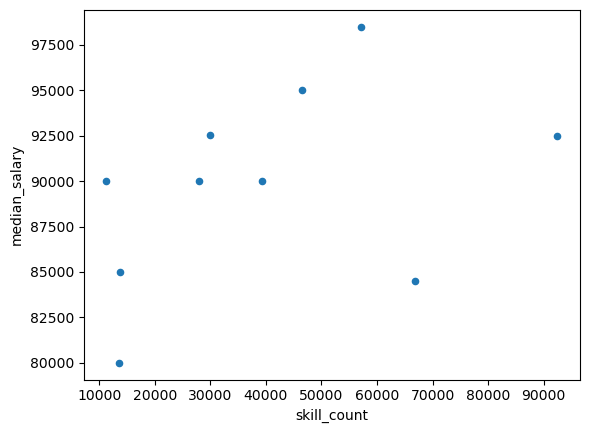

In [46]:
df_merged.head(10).plot(kind='scatter', x='skill_count', y='median_salary')

In [50]:
#or

df_count_median = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)


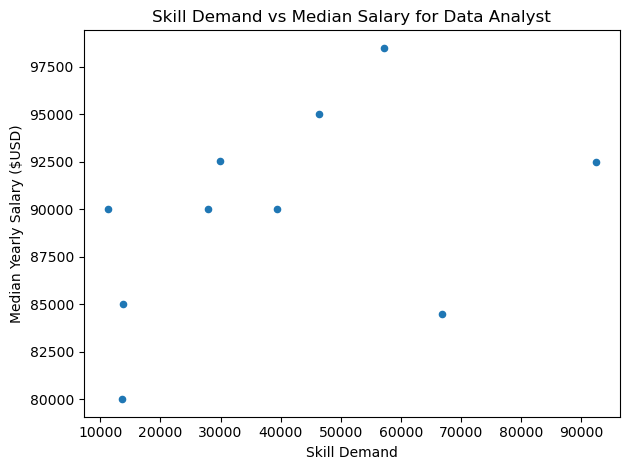

In [56]:
df_count_median.sort_values(by='skill_count', ascending=False, inplace=True)
df_count_median.head(10).plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Skill Demand')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Skill Demand vs Median Salary for {job_title}')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

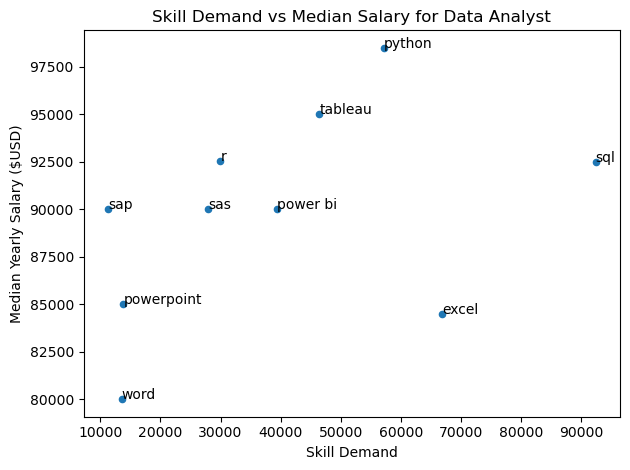

In [70]:
plt.figure(figsize=(10, 6))
df_count_median = df_count_median.head(10)
df_count_median.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Skill Demand')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Skill Demand vs Median Salary for {job_title}')
plt.tight_layout()

for i, row in enumerate(df_count_median.index):
    plt.text(df_count_median['skill_count'].iloc[i], df_count_median['median_salary'].iloc[i], row)

plt.show()